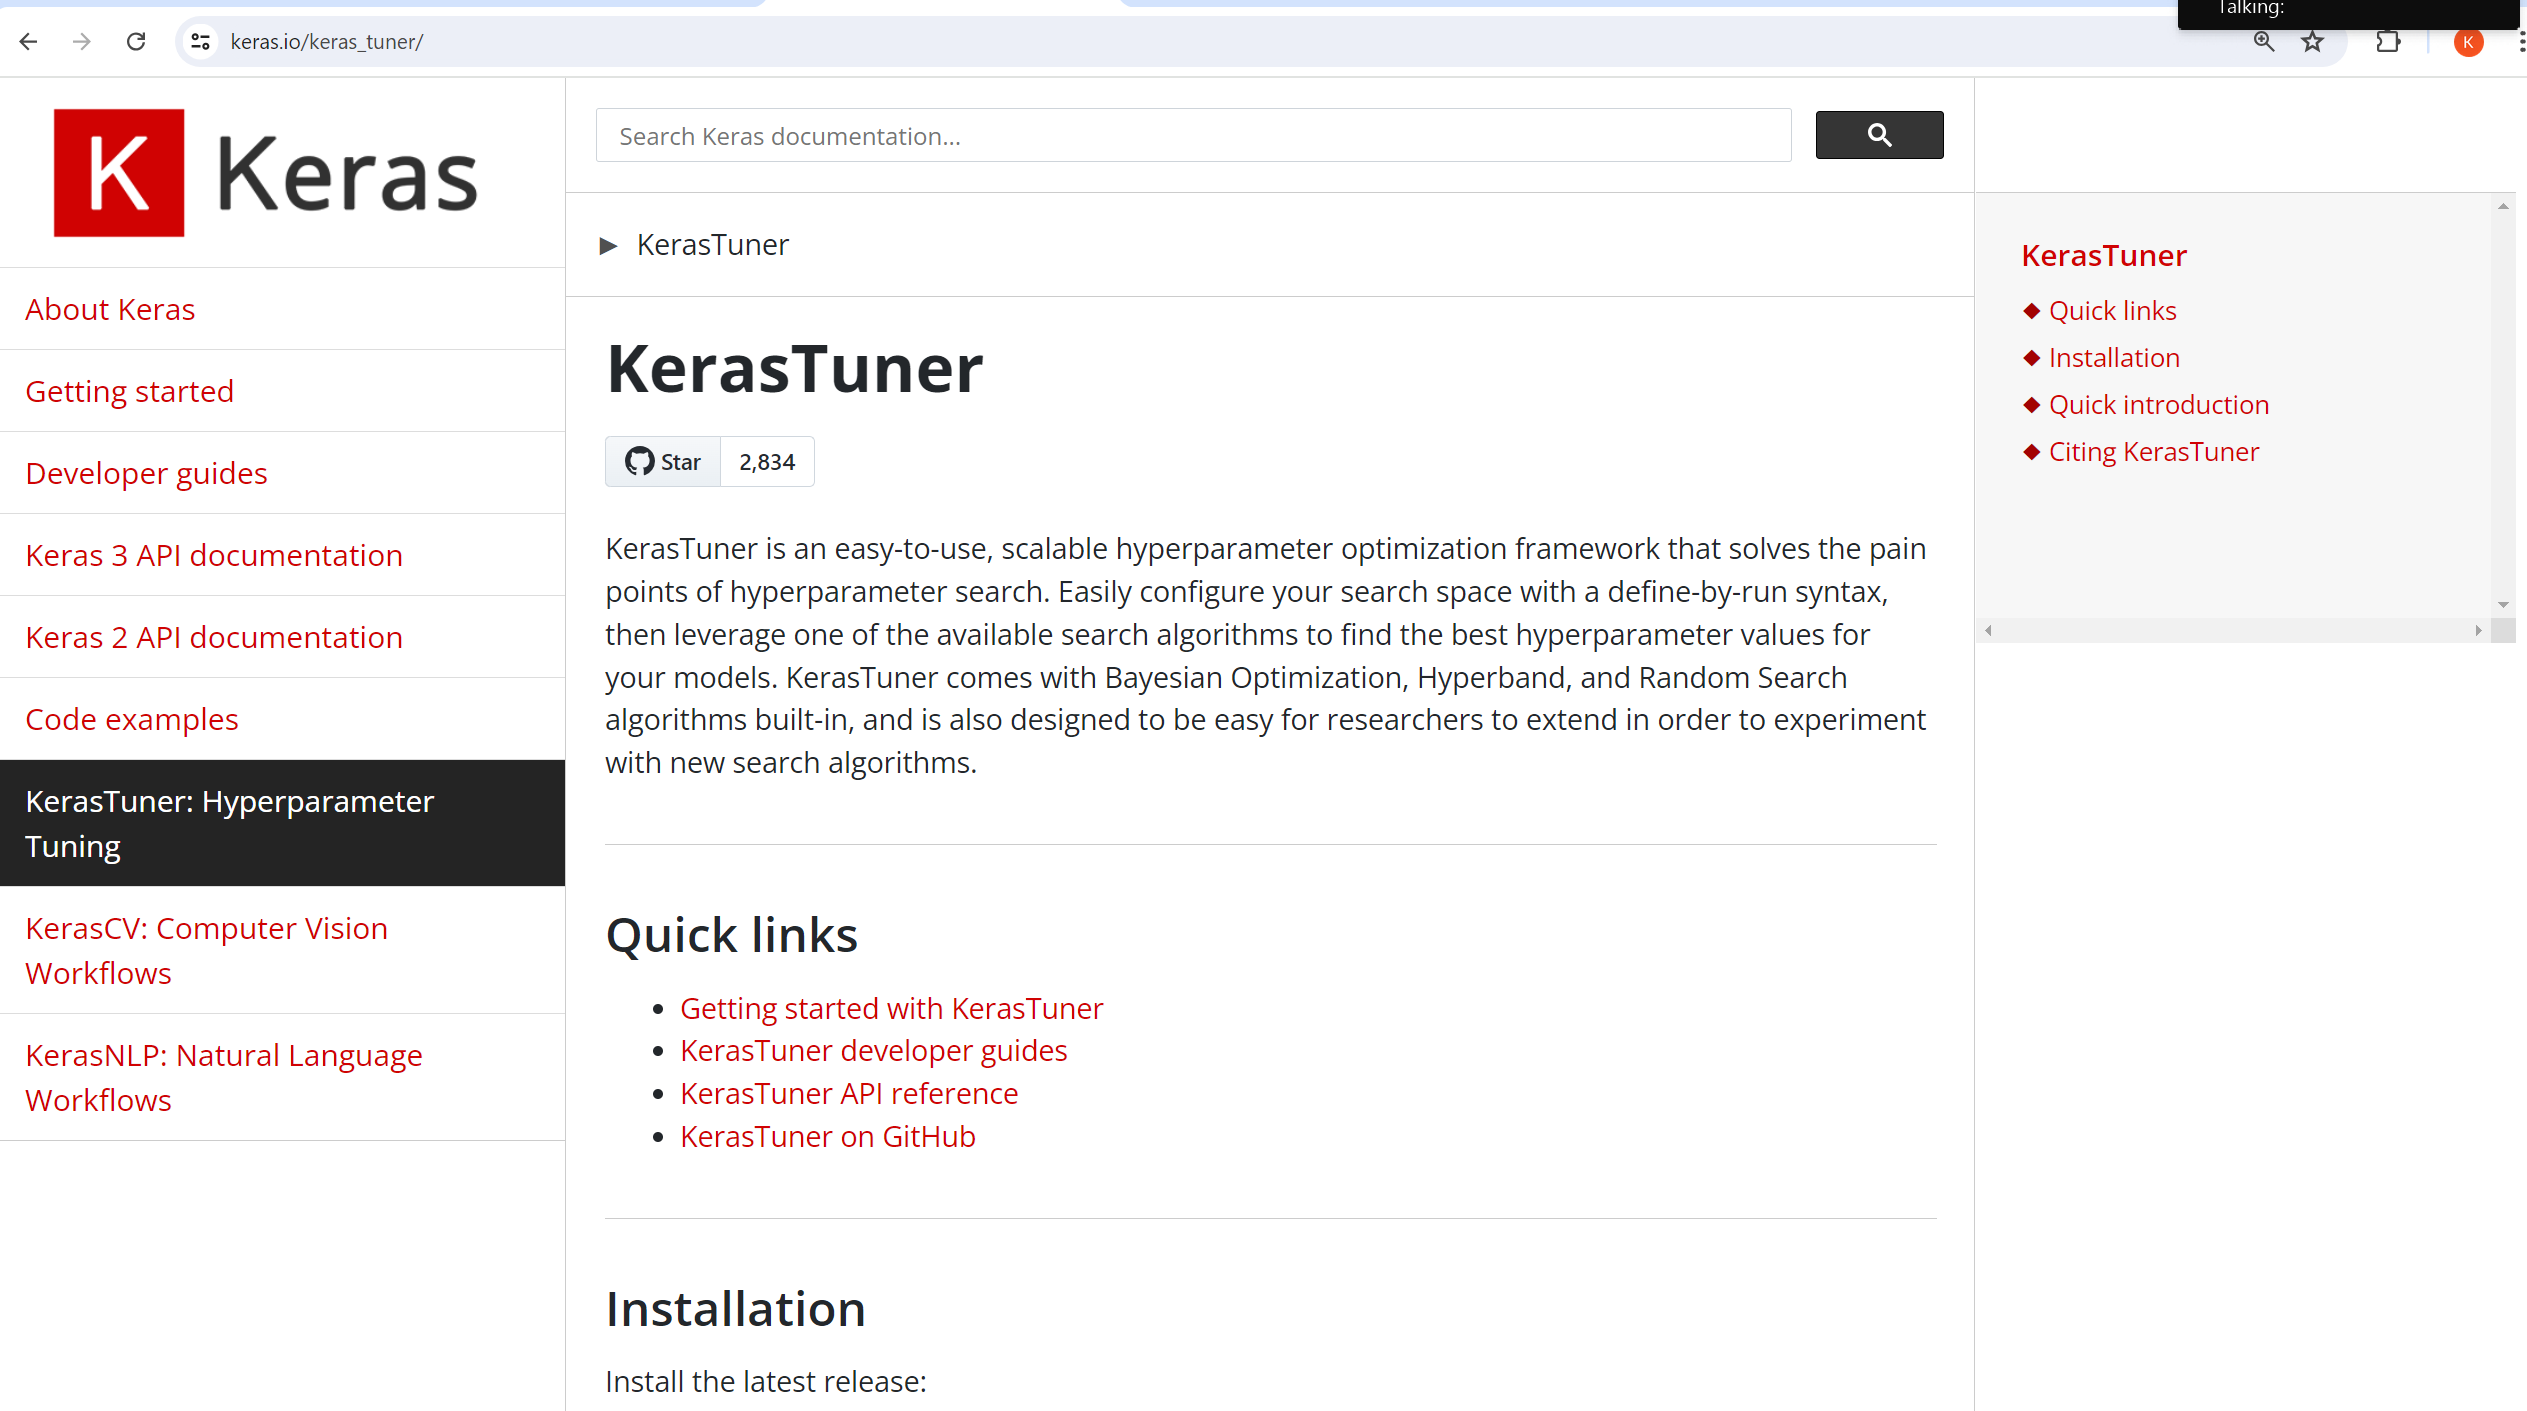

In [2]:
import numpy as np
import pandas as pd
import os
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = df.iloc[:,3:]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df = pd.get_dummies(df, columns = ['Geography','Gender'], drop_first=True )
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [6]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [7]:
df['Geography_Germany'] = np.where(df['Geography_Germany']==True,1, 0)
df['Geography_Spain'] = np.where(df['Geography_Spain']==True,1, 0)
df['Gender_Male'] = np.where(df['Gender_Male']==True,1, 0)

In [8]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [9]:
x = df.drop(['Exited'], axis=1)
y = df[['Exited']]

In [10]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [23]:
x.shape

(10000, 11)

In [11]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [18]:
y.value_counts()/len(y)*100

Exited
0         79.63
1         20.37
Name: count, dtype: float64

In [12]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sc = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [13]:
x_sc.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,-1.095988


In [24]:
x_sc.shape

(10000, 11)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.15, random_state=42, stratify=y)

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras import Sequential

# HyperParameter Tunning
### a) how many layers
### b) how many neurons on each layers
### c) which activation function
### d) dropout percentage
### e) which optimization

In [21]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [22]:
import keras_tuner as kt

In [28]:
def build_model(hp):
  model = Sequential()
  counter = 0

  for i in range(hp.Int('num_layers', min_value=1, max_value=5)):
    if counter ==0:
      model.add(Dense(hp.Int('Num_Neurons' + str(i), min_value=4, max_value=128, step=4),
                      activation=hp.Choice('activation' + str(i),
                                           values = ['relu','leaky_relu','sigmoid','tanh']),
                      input_dim=11))
      model.add(Dropout(hp.Choice('dropout' + str(i),
                                  values=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])))
    else:
      model.add(Dense(hp.Int('Num_Neurons' + str(i), min_value=4, max_value=128, step=4)),
                      activation=hp.Choice('activation' + str(i),
                                           values = ['relu','leaky_relu','sigmoid','tanh']))
      model.add(Dropout(hp.Choice('dropout' + str(i),
                                  values=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])))
    counter +=1
  model.add(Dense(1, activation='sigmoid'))


  model.compile(optimizer=hp.Choice('optimizer',
                                    values = ['adam','rmsprop','sgd']),
                loss = 'binary_crossentropy', metrics=['accuracy'])
  return model

In [29]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5, directory='mydir', project_name ='hyperparameter')

In [30]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 00s]

Best val_accuracy So Far: 0.859333336353302
Total elapsed time: 00h 00m 12s


In [37]:
tuner.get_trial_dir

<bound method BaseTuner.get_trial_dir of <keras_tuner.src.tuners.randomsearch.RandomSearch object at 0x7c3aca0acf10>>

In [31]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'Num_Neurons0': 84,
 'activation0': 'relu',
 'dropout0': 0.25,
 'optimizer': 'adam',
 'Num_Neurons1': 104,
 'activation1': 'sigmoid'}

In [32]:
model = tuner.get_best_models(num_models = 1)[0]

In [34]:
history = model.fit(x_train, y_train, batch_size=32, epochs=50, initial_epoch=5, validation_data=(x_test, y_test) )

Epoch 6/50
266/266 [==============================] - 1s 3ms/step - loss: 0.3628 - accuracy: 0.8513 - val_loss: 0.3598 - val_accuracy: 0.8567
Epoch 7/50
266/266 [==============================] - 1s 4ms/step - loss: 0.3575 - accuracy: 0.8524 - val_loss: 0.3611 - val_accuracy: 0.8640
Epoch 8/50
266/266 [==============================] - 1s 5ms/step - loss: 0.3533 - accuracy: 0.8538 - val_loss: 0.3601 - val_accuracy: 0.8560
Epoch 9/50
266/266 [==============================] - 1s 3ms/step - loss: 0.3529 - accuracy: 0.8559 - val_loss: 0.3562 - val_accuracy: 0.8560
Epoch 10/50
266/266 [==============================] - 1s 3ms/step - loss: 0.3539 - accuracy: 0.8518 - val_loss: 0.3561 - val_accuracy: 0.8573
Epoch 11/50
266/266 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 0.8540 - val_loss: 0.3552 - val_accuracy: 0.8560
Epoch 12/50
266/266 [==============================] - 1s 2ms/step - loss: 0.3493 - accuracy: 0.8548 - val_loss: 0.3544 - val_accuracy: 0.8573
Epo

# Convolutional Neural Network

In [38]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [39]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /=255
x_test /=255

In [40]:
x_train.shape

(60000, 28, 28)

In [52]:
#!pip install np_utils

In [48]:
#import numpy as np
#from keras.utils.np_utils import to_categorical
#import np_utils

In [51]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [53]:
from keras.layers import Conv2D, MaxPooling2D

In [54]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', strides=1, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                401472    
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                      

In [55]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1823 - accuracy: 0.9463 - val_loss: 0.0679 - val_accuracy: 0.9797
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0589 - accuracy: 0.9823 - val_loss: 0.0551 - val_accuracy: 0.9808
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 0.0485 - val_accuracy: 0.9845
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0640 - val_accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0524 - val_accuracy: 0.9853
